In [3]:
import scanpy as sc


[Executed on 2023-11-29 15:19:32.719294]


In [4]:
#old_sgns=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/known_cluster.h5ad')
new_sgns=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/First_annotated.h5ad')

[Executed on 2023-11-29 15:20:01.380930]


[Executed on 2023-11-29 15:20:17.216544]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

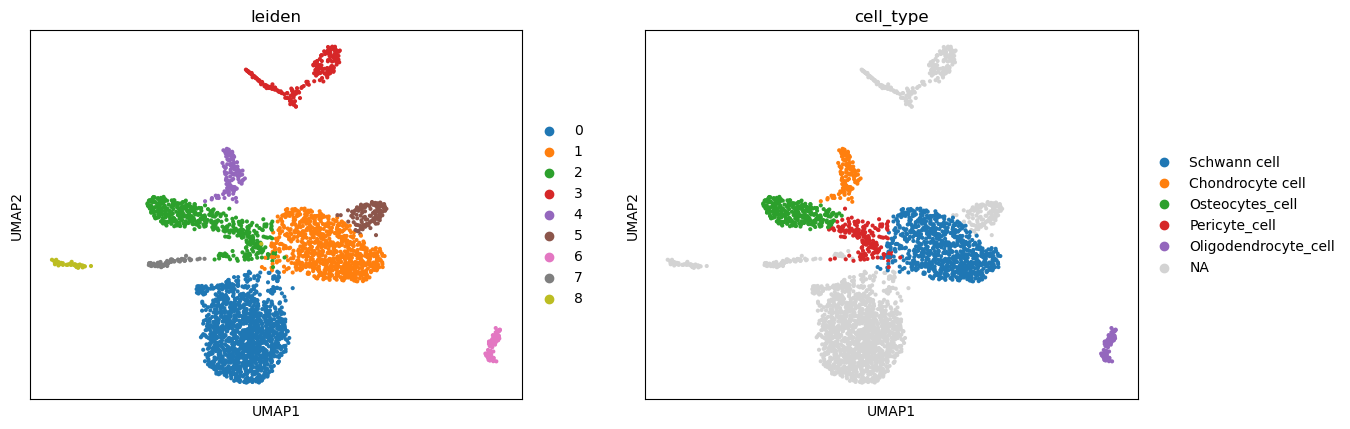

In [5]:
sc.pl.umap(new_sgns,color=['leiden','cell_type'])

[Executed on 2023-11-29 15:50:02.957188]


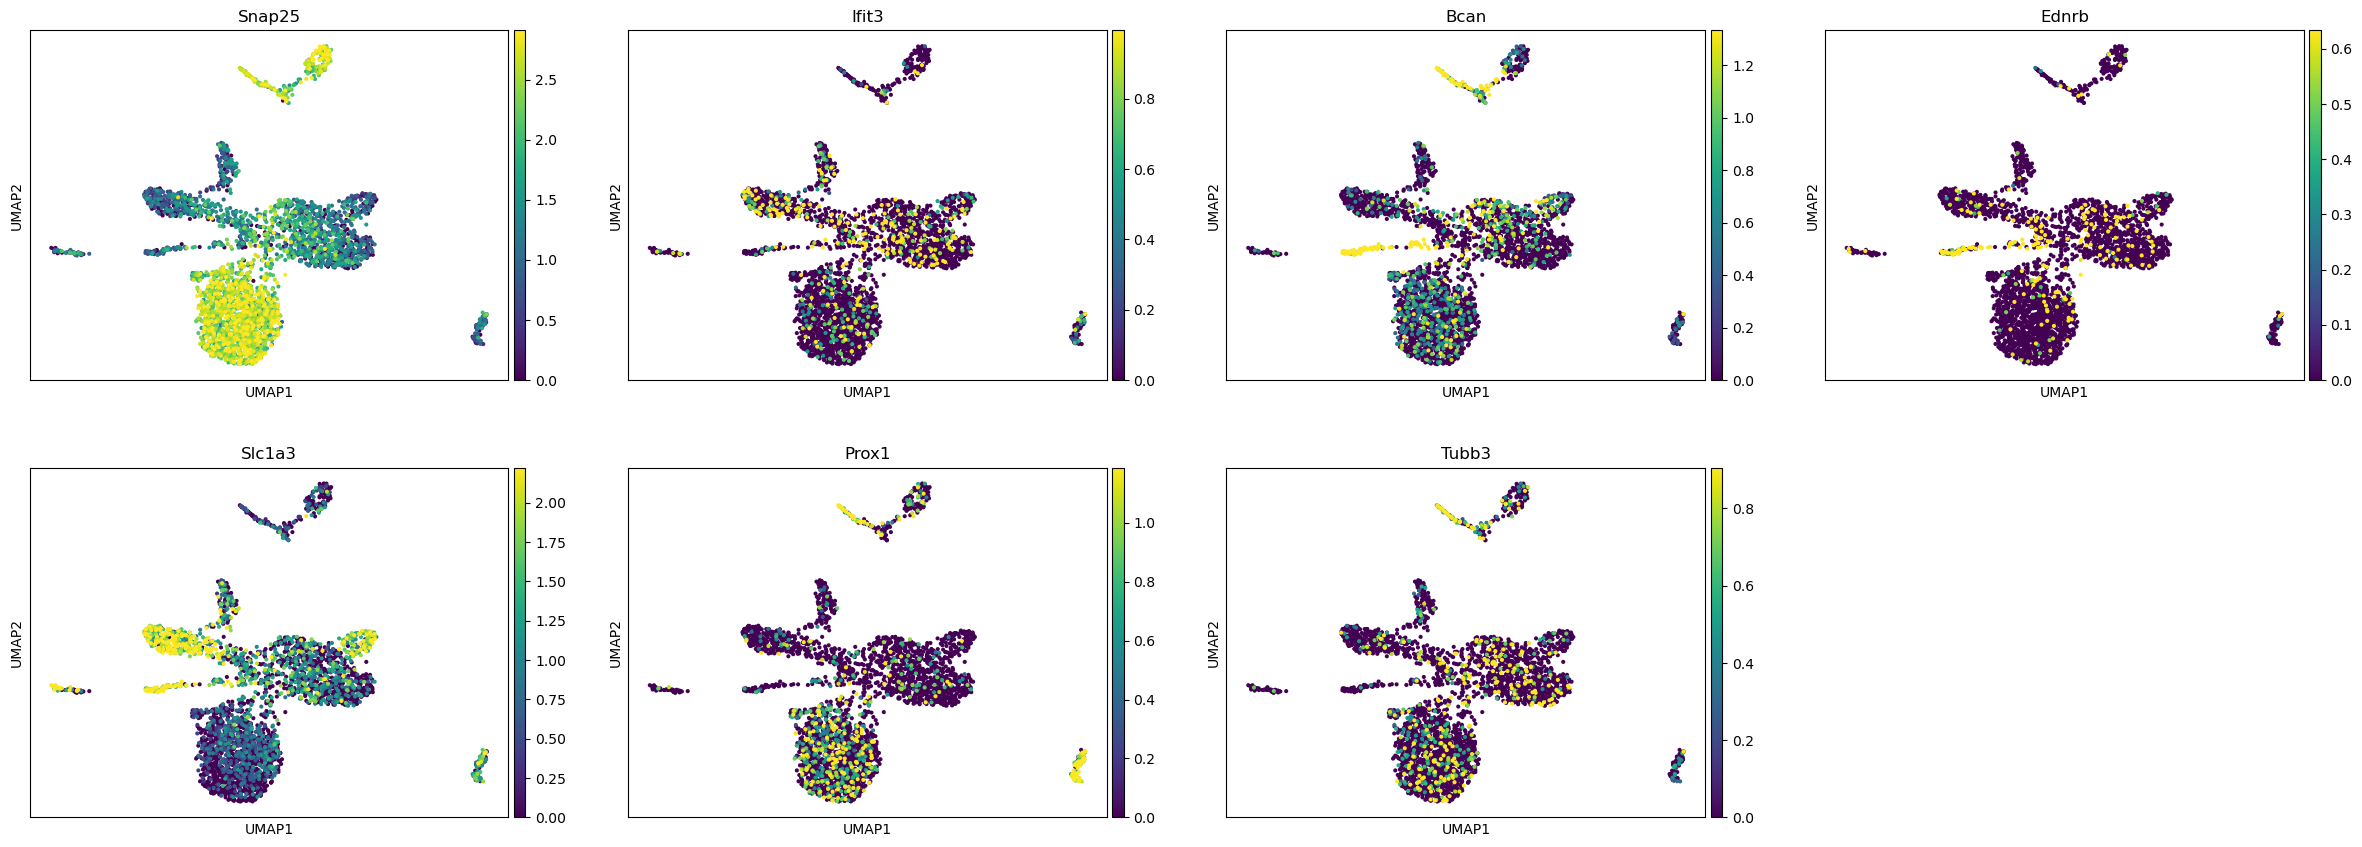

In [29]:
sc.pl.umap(new_sgns,color=['Snap25','Ifit3','Bcan','Ednrb','Slc1a3','Prox1','Tubb3'],layer='log1p',vmax='p95')

In [27]:
sc.tl.rank_genes_groups(new_sgns,groupby='leiden',method='wilcoxon',n_genes=1000)
import pandas as pd
pd.DataFrame(new_sgns.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-11-29 15:47:35.445268]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0,1,2,3,4,5,6,7,8
0,Meg3,Hcn1,Cped1,Mir124a-1hg,Bnc2,Slc6a15,4930420G21Rik,Slc39a12,Inpp5d
1,Rian,Mpz,Atp1a2,Zfp385b,Foxp2,Pde1c,Prr5l,Slc4a4,AU020206
2,Nalf1,Gfra1,Colec12,Vsnl1,Cped1,Lama1,Tmeff2,Slc1a2,Dock2
3,Gm27000,Art3,Slc24a3,Dnm1,Ank2,Mpzl1,Trf,Aqp4,Tgfbr1
4,Ptprn2,Plekha4,Arhgap29,Kcnc1,Eya2,Slit3,Slc24a2,Luzp2,Dock8
5,Nrxn1,Mbp,Dock6,Astn2,Mrc2,Npas3,Pde4b,Ntm,Ptprc
6,Syt1,Ctnna3,Cp,Ank1,Stk39,Ddhd1,Spock3,Ptprz1,Fyb
7,Snap25,Shc4,Ptgds,Scn1a,Tmtc1,Hdac9,Plp1,Bmpr1b,Hexb
8,Pde10a,Qki,Slc6a13,Rims1,Phldb2,Trpm3,Phlpp1,Sema6d,Nckap1l
9,Gnas,Aatk,Sned1,Atp2b3,Dock5,Dlc1,Mog,Adgrb3,Lyn


In [7]:
cluster3=new_sgns[new_sgns.obs['leiden']=='3',:]
cluster3

[Executed on 2023-11-29 15:21:04.172986]


View of AnnData object with n_obs × n_vars = 214 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-11-29 15:23:32.614638]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


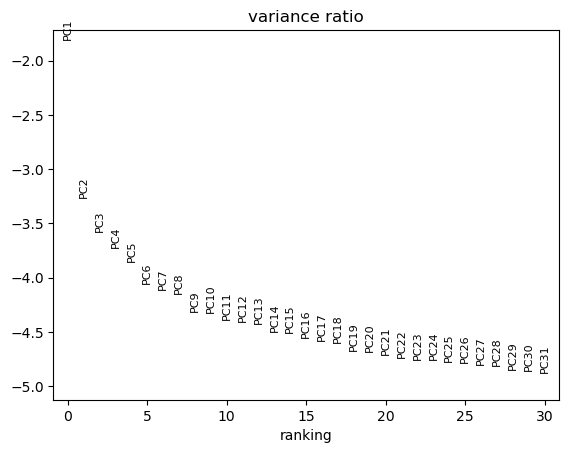

In [8]:
cluster3.X=cluster3.layers['log1p'].copy()
sc.pp.highly_variable_genes(cluster3, n_top_genes=800, flavor='seurat_v3')
sc.pp.scale(cluster3, max_value=10)
sc.tl.pca(cluster3, svd_solver='arpack')
sc.pl.pca_variance_ratio(cluster3, log=True)

[Executed on 2023-11-29 15:24:42.272104]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

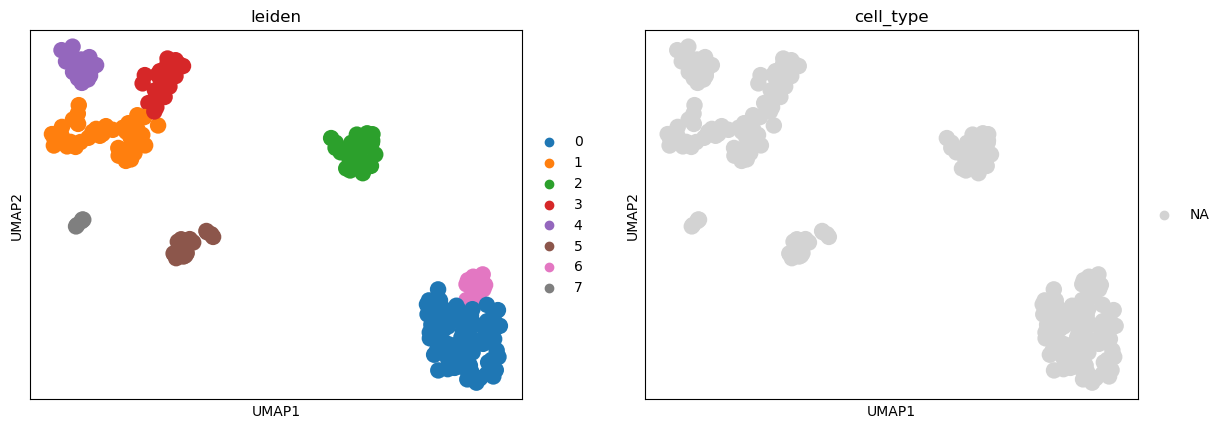

In [9]:
sc.pp.neighbors(cluster3, n_neighbors=10, n_pcs=10)

sc.tl.umap(cluster3)

sc.tl.leiden(cluster3, resolution=0.5)

sc.pl.umap(cluster3,color=['leiden','cell_type'])

[Executed on 2023-11-29 15:51:24.602820]


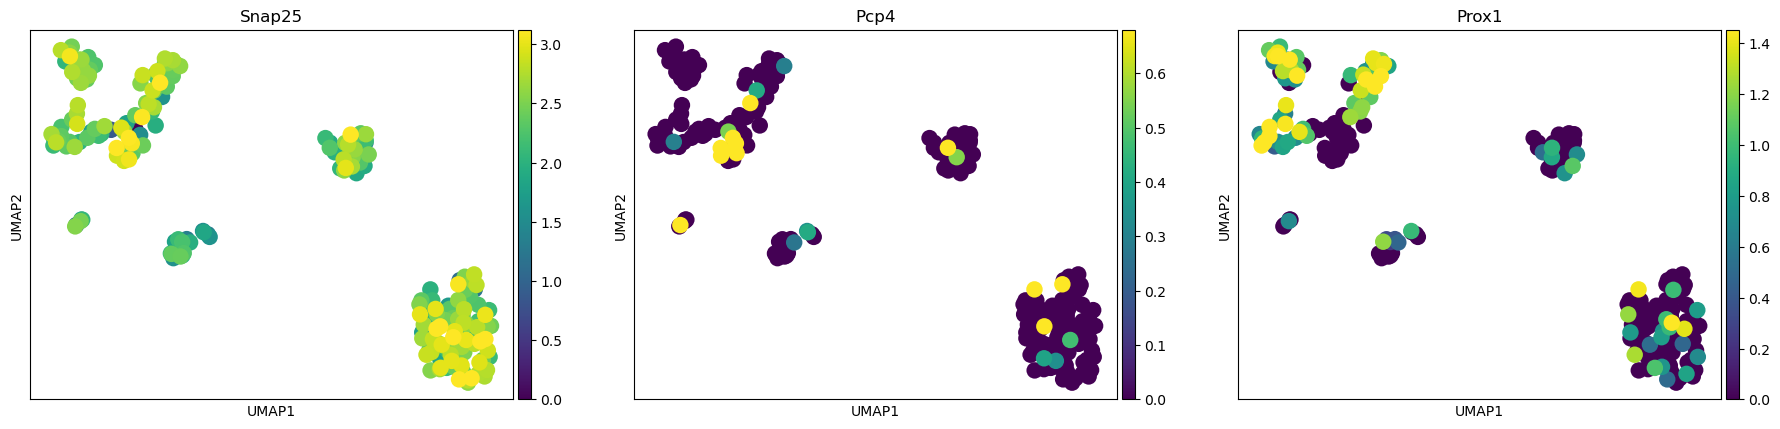

In [30]:
sc.pl.umap(cluster3, color=['Snap25','Pcp4','Prox1'],layer='log1p',vmax='p95')

[Executed on 2023-11-29 15:27:43.754332]


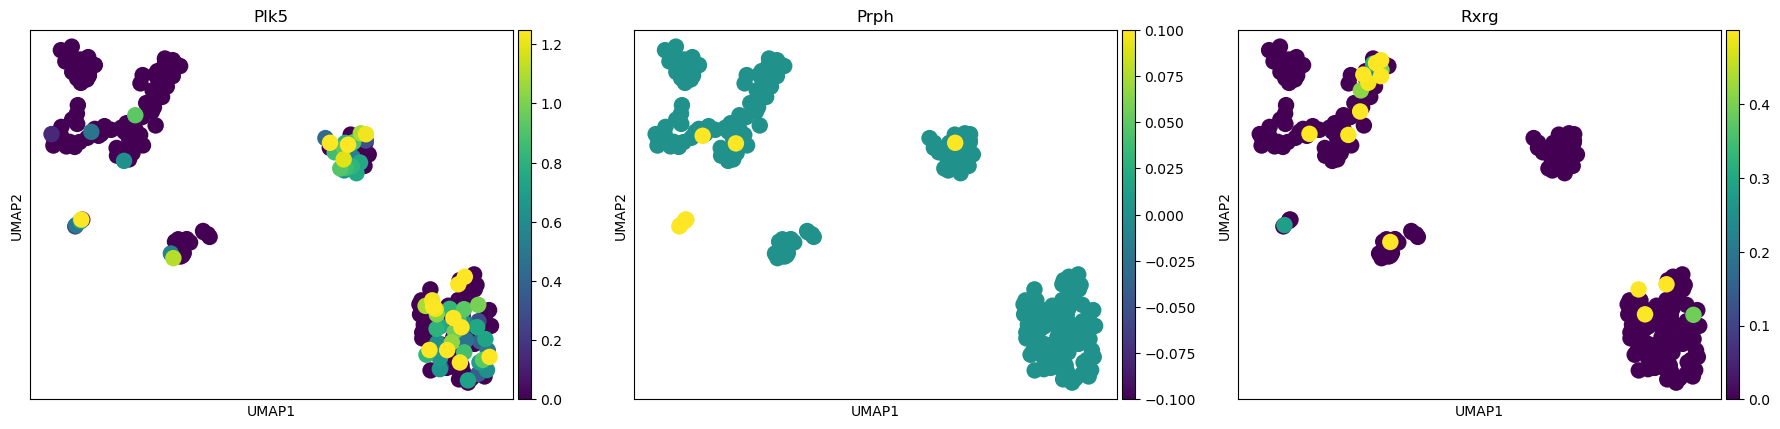

In [15]:
sc.pl.umap(cluster3,color=['Plk5','Prph','Rxrg'],vmax='p95',layer='log1p')

[Executed on 2023-11-29 15:29:58.456619]


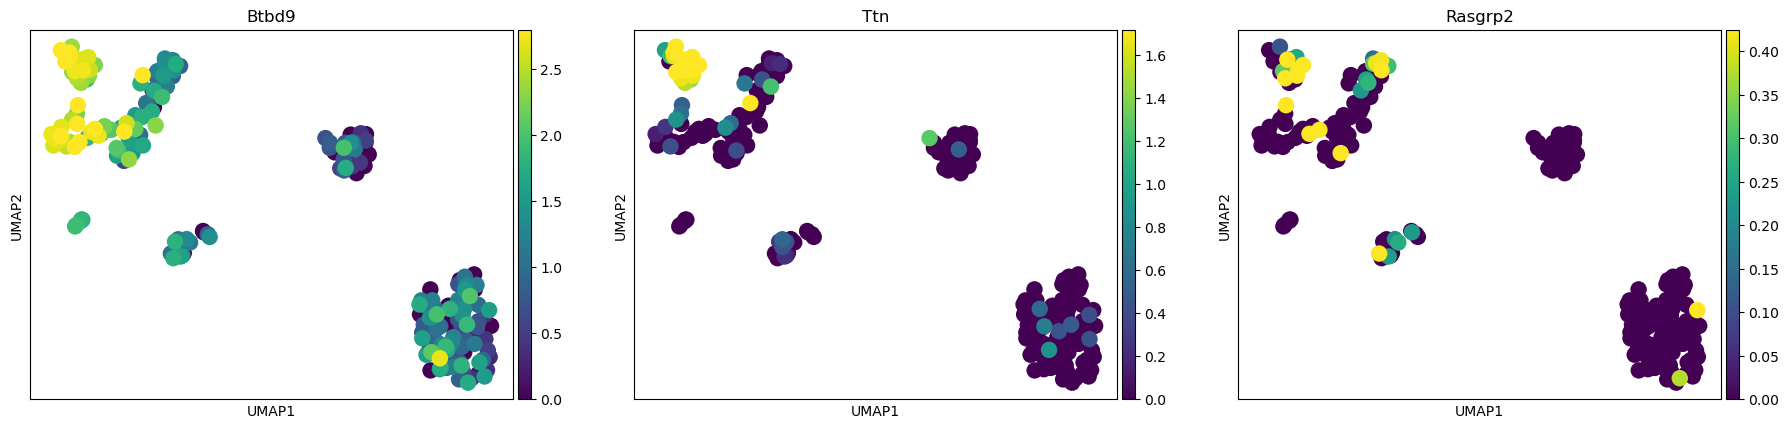

In [18]:
sc.pl.umap(cluster3, color=['Btbd9','Ttn','Rasgrp2'],vmax='p95',  layer='log1p')

[Executed on 2023-11-29 15:53:22.157954]


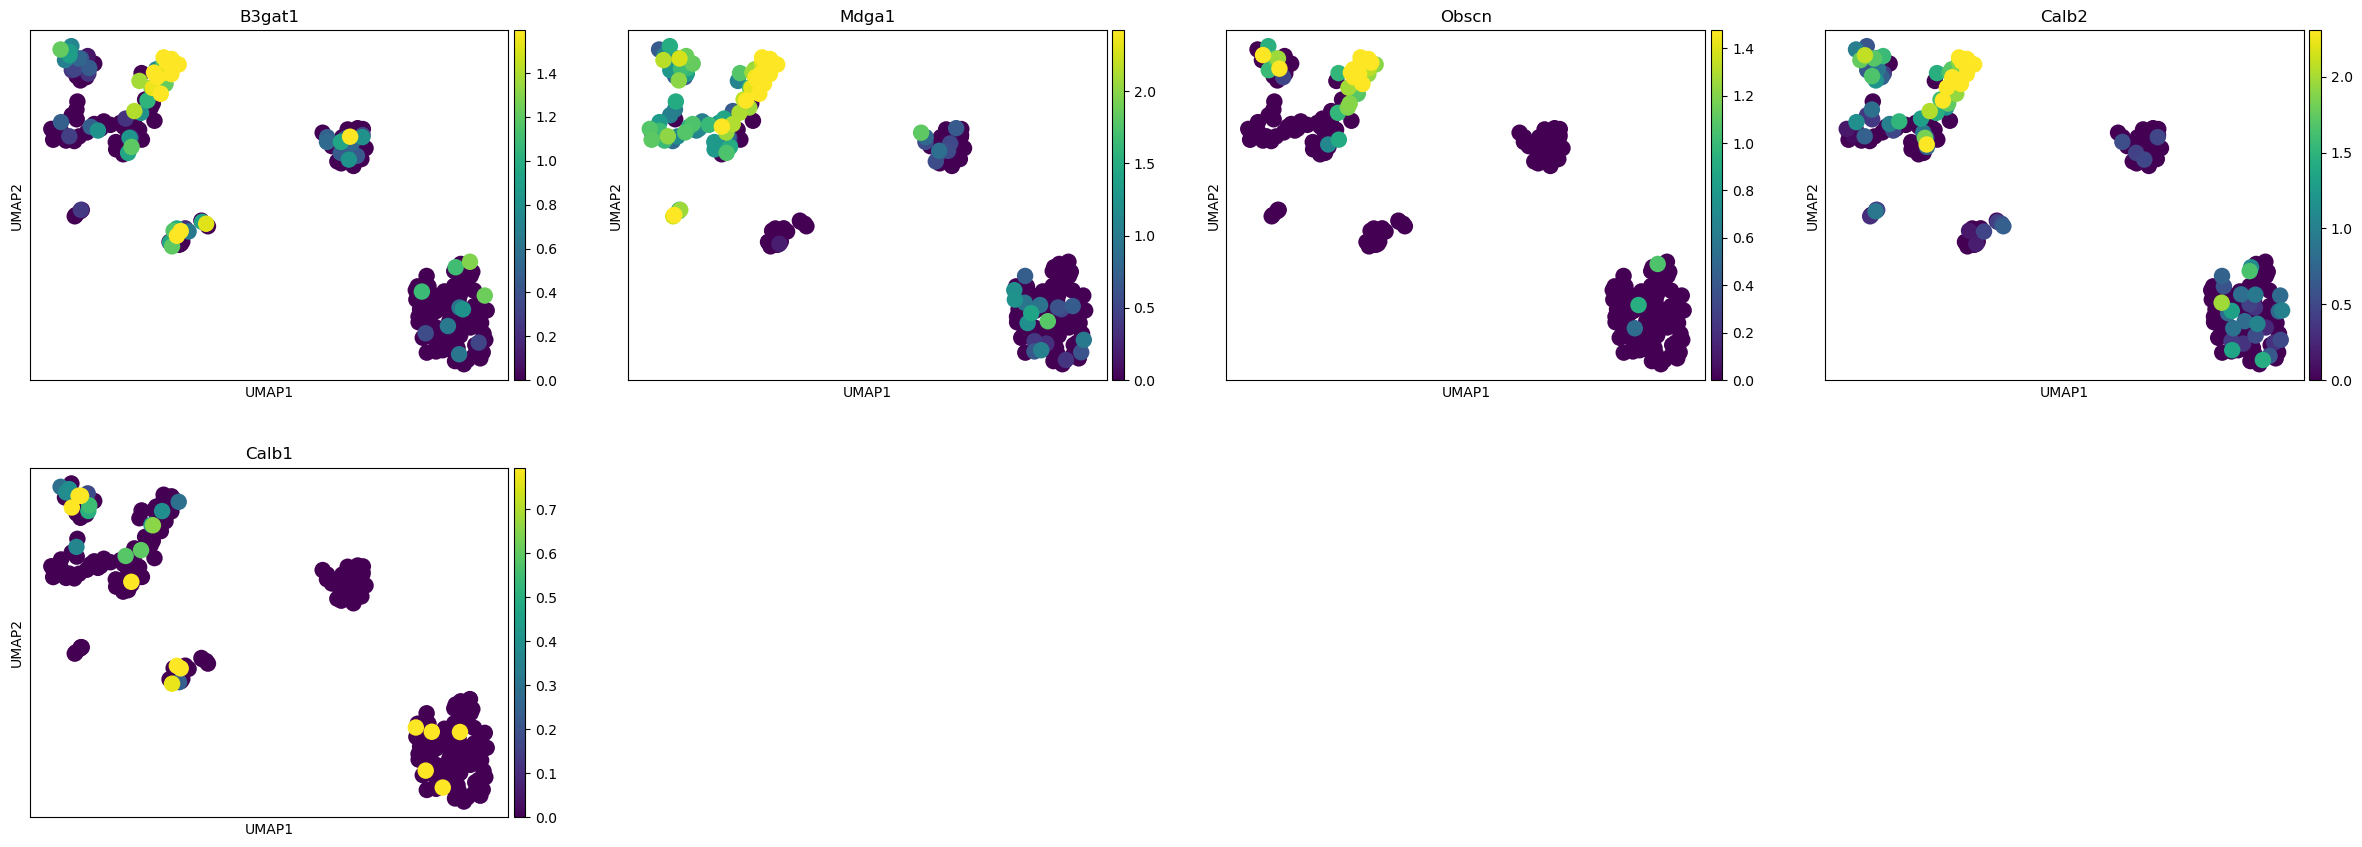

In [31]:
sc.pl.umap(cluster3,color=['B3gat1','Mdga1','Obscn','Calb2','Calb1'],layer='log1p',vmax='p95')

[Executed on 2023-11-29 15:56:10.183659]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


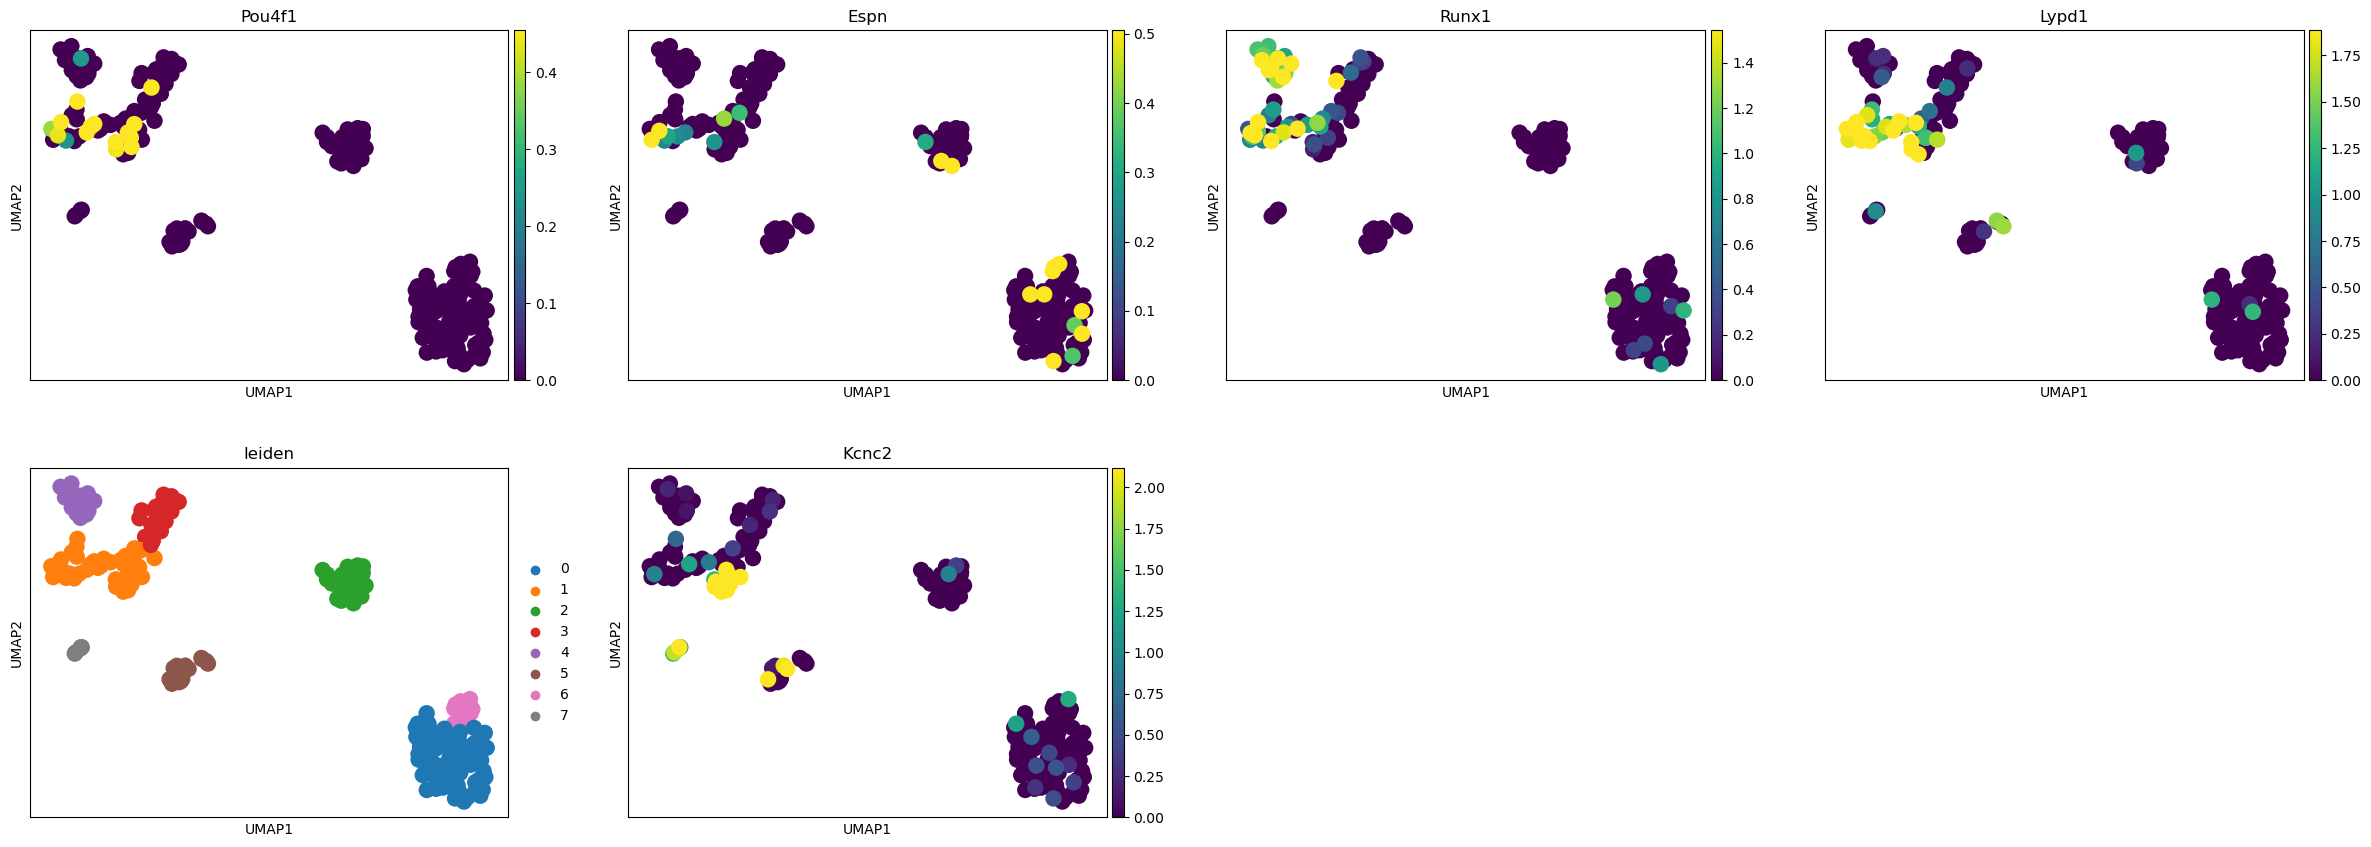

In [32]:
sc.pl.umap(cluster3,color=['Pou4f1','Espn','Runx1','Lypd1','leiden','Kcnc2'],layer='log1p',vmax='p95')


# get rid of pcp4, recluster, vestibular ganglion, nly keep sgns, kcnc2 low because aging, high because of vestibular

In [22]:
import pandas as pd
sc.tl.rank_genes_groups(cluster3, 'leiden', method='wilcoxon', n_genes=1000)


pd.DataFrame(cluster3.uns['rank_genes_groups']['names']).head(10)

[Executed on 2023-11-29 15:35:51.313064]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryag

,0,1,2,3,4,5,6,7
0,Grik2,D130009I18Rik,Lrrtm4,Cdh9,Ttn,Mdga2,Gm28437,Mylf-ps
1,Fgf14,Grm8,Mgat5,Calb2,Pdzd2,Whrn,mt-Co1,Skap1
2,Ntrk3,Mgat4c,Gm42397,Mdga1,Lhfpl3,Meis2,Gsn,Abi3bp
3,Grm4,Lypd1,Dgkb,Ghr,Runx1,Smyd4,Apoe,Hip1
4,Tenm1,Bcl11a,Dscaml1,Rgs6,Grm7,9330162G02Rik,Gm10925,Tmem132e
5,Mctp1,Colgalt2,Lmx1a,Obscn,Camta1,Sgcd,Mpz,Dusp29
6,Syne1,Nckap5,Arpp21,Nin,Sema3e,Mkx,Apod,Grik3
7,Pde10a,Btbd9,Trank1,Iqsec3,Grip1,Sntg1,Eef1a1,Prph
8,Trhde,Csmd1,Ppp1r14c,Cpne4,Btbd9,Gm36264,Ptgds,Smad6
9,Caln1,Hmcn1,Zic1,Spock3,Gm16083,Wsb1,Tiam1,Myl1


[Executed on 2023-11-28 19:55:27.627316]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


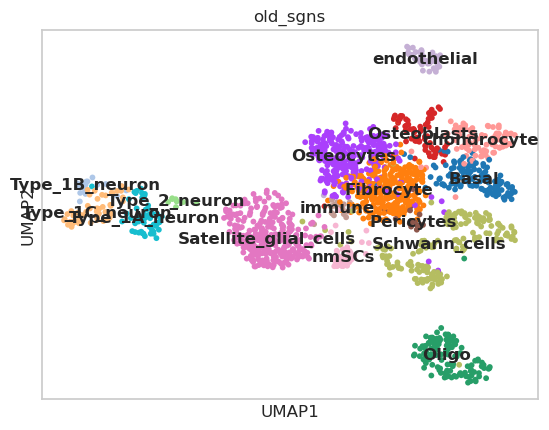

In [189]:
sc.pl.umap(old_sgns,color='cell_type',legend_loc='on data', title='old_sgns')

In [198]:
combined=old_sgns.concatenate(new_sgns,join='outer',batch_categories=['old_sgns','new_sgns'])
combined

[Executed on 2023-11-28 20:04:26.305587]


/scratch/43158822/ipykernel_6659/3314263117.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined=old_sgns.concatenate(new_sgns,join='outer',batch_categories=['old_sgns','new_sgns'])


AnnData object with n_obs × n_vars = 5135 × 38097
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts'
    var: 'mean-new_sgns', 'std-new_sgns', 'n_cells-new_sgns', 'mt-new_sgns', 'n_cells_by_counts-new_sgns', 'mean_counts-new_sgns', 'pct_dropout_by_counts-new_sgns', 'total_counts-new_sgns', 'highly_variable-new_sgns', 'highly_variable_rank-new_sgns', 'means-new_sgns', 'variances-new_sgns', 'variances_norm-new_sgns', 'mean-old_sgns', 'std-old_sgns', 'highly_variable-0-old_sgns', 'highly_variable_rank-0-old_sgns', 'means-0-old_sgns', 'variances-0-old_sgns', 'variances_norm-0-old_sgns', 'highly_variable-1-old_sgns', 'highly_variable_rank-1-old_sgns', 'means-1-old_sgns', 'variances-1-o

In [200]:
combined

[Executed on 2023-11-28 20:04:49.230236]


AnnData object with n_obs × n_vars = 5135 × 38097
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts'
    var: 'mean-new_sgns', 'std-new_sgns', 'n_cells-new_sgns', 'mt-new_sgns', 'n_cells_by_counts-new_sgns', 'mean_counts-new_sgns', 'pct_dropout_by_counts-new_sgns', 'total_counts-new_sgns', 'highly_variable-new_sgns', 'highly_variable_rank-new_sgns', 'means-new_sgns', 'variances-new_sgns', 'variances_norm-new_sgns', 'mean-old_sgns', 'std-old_sgns', 'highly_variable-0-old_sgns', 'highly_variable_rank-0-old_sgns', 'means-0-old_sgns', 'variances-0-old_sgns', 'variances_norm-0-old_sgns', 'highly_variable-1-old_sgns', 'highly_variable_rank-1-old_sgns', 'means-1-old_sgns', 'variances-1-o

In [203]:
combined

[Executed on 2023-11-28 20:05:33.538586]


AnnData object with n_obs × n_vars = 5135 × 38097
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts'
    var: 'mean-new_sgns', 'std-new_sgns', 'n_cells-new_sgns', 'mt-new_sgns', 'n_cells_by_counts-new_sgns', 'mean_counts-new_sgns', 'pct_dropout_by_counts-new_sgns', 'total_counts-new_sgns', 'highly_variable-new_sgns', 'highly_variable_rank-new_sgns', 'means-new_sgns', 'variances-new_sgns', 'variances_norm-new_sgns', 'mean-old_sgns', 'std-old_sgns', 'highly_variable-0-old_sgns', 'highly_variable_rank-0-old_sgns', 'means-0-old_sgns', 'variances-0-old_sgns', 'variances_norm-0-old_sgns', 'highly_variable-1-old_sgns', 'highly_variable_rank-1-old_sgns', 'means-1-old_sgns', 'variances-1-o

In [207]:
# Add a new category called 'new'
combined.obs['machine'] = combined.obs['machine'].cat.add_categories(['new'])

# Fill NaN values with the new category
combined.obs['machine'] = combined.obs['machine'].fillna('new')


[Executed on 2023-11-28 20:08:25.147205]


[Executed on 2023-11-28 20:08:32.758609]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

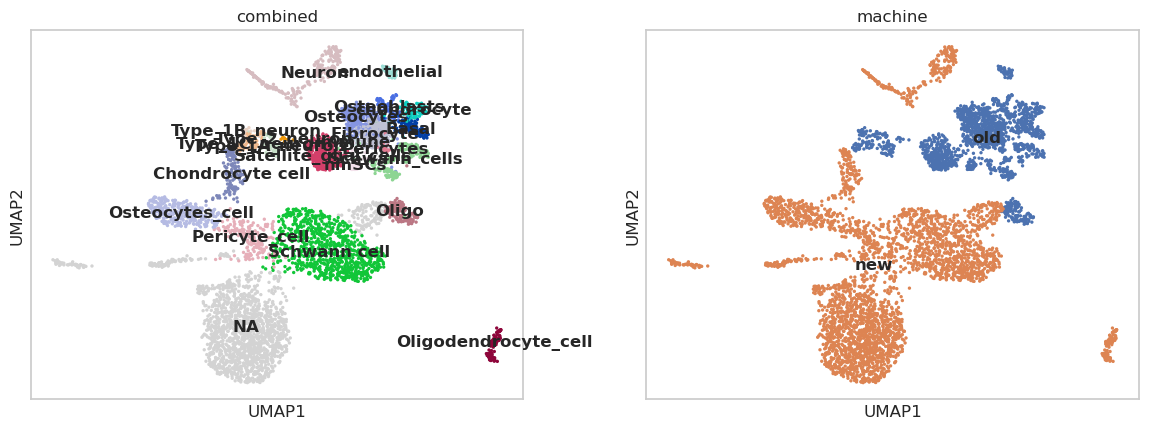

In [208]:
sc.pl.umap(combined,color=['cell_type','machine'],legend_loc='on data', title='combined')

In [192]:
combined.obs['cell_type'].value_counts()

[Executed on 2023-11-28 20:02:06.709681]


cell_type
Schwann cell             851
Fibrocyte                310
Satellite_glial_cells    305
Osteocytes_cell          294
Osteocytes               273
Neuron                   214
Pericyte_cell            193
Schwann_cells            174
Chondrocyte cell         130
Basal                    124
Oligo                    122
chondrocyte               89
Oligodendrocyte_cell      88
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
nmSCs                     39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

In [209]:
combined.obs['cell_type']=combined.obs['cell_type'].astype('str')

[Executed on 2023-11-28 20:08:54.600980]


In [210]:
#only include cell type that include "euron"
combined=combined[combined.obs['cell_type'].str.contains('euron')]
combined.obs['cell_type'].value_counts()

[Executed on 2023-11-28 20:08:57.888402]


cell_type
Neuron            214
Type_1C_neuron     56
Type_1A_neuron     54
Type_1B_neuron     19
Type_2_neuron       8
Name: count, dtype: int64

In [211]:
combined.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/neuron_only.h5ad')

[Executed on 2023-11-28 20:10:14.282306]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


TypeError: Can't implicitly convert non-string objects to strings

In [197]:
combined

[Executed on 2023-11-28 20:04:03.145733]


View of AnnData object with n_obs × n_vars = 351 × 38097
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal', 'X_umap_10.27'
    layers: 'Scale', 'log1p', 'umi', 're

[Executed on 2023-11-28 19:52:42.225687]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


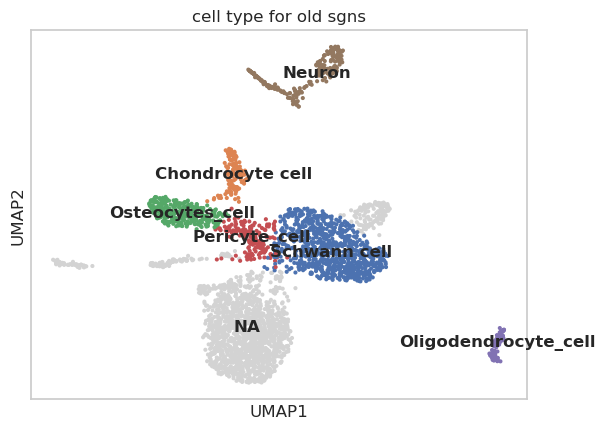

In [184]:
sc.pl.umap(new_sgns,color=['cell_type'],legend_loc='on data', title='cell type for old sgns')

In [180]:
import pandas as pd
# Check if 'cell_type' column already exists, if not create it as a categorical column
if 'cell_type' not in new_sgns.obs:
    new_sgns.obs['cell_type'] = pd.Categorical([])

# Add 'Chondrocyte cell' to the categories if it's not already there
if 'Neuron' not in new_sgns.obs['cell_type'].cat.categories:
    new_sgns.obs['cell_type'] = new_sgns.obs['cell_type'].cat.add_categories(['Neuron'])

# Assign "Chondrocyte cell" to cells where 'leiden' is '4'
new_sgns.obs.loc[new_sgns.obs['leiden'] == '3', 'cell_type'] = 'Neuron'


[Executed on 2023-11-28 19:51:56.303400]


In [26]:
old_sgns.var_names_make_unique()
new_sgns.var_names_make_unique()

[Executed on 2023-11-28 13:32:18.488411]


In [27]:
#concatenate the two datasets, old_sgns and new_sgns, named it old and new
old_sgns.obs['machine']='old'
new_sgns.obs['machine']='new'
new_data=old_sgns.concatenate(new_sgns,batch_key='machine')

[Executed on 2023-11-28 13:32:18.581444]


/scratch/43158822/ipykernel_6659/4181704515.py:4: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  new_data=old_sgns.concatenate(new_sgns,batch_key='machine')


In [40]:
# Check available gene names in the dataset
available_genes = new_data.var_names
print(available_genes)


[Executed on 2023-11-28 13:47:21.128568]
Index(['H19', 'Ngfr', 'Fgf23', 'Th', 'Glra1', 'Cdh1', 'Cdh4', 'Rem1', 'Mx1',
       'Fap',
       ...
       'Wdr88', 'Gm52980', 'Gm53033', 'Gm7592', 'Ahnak2', 'Gm25313', 'Gm26245',
       'Rnu5g', 'Gm23287', 'Gm26127'],
      dtype='object', length=3500)


In [45]:
# Check available gene names in the dataset
available_genes = new_data.var_names
print(available_genes)


[Executed on 2023-11-28 13:49:14.999768]
Index(['H19', 'Ngfr', 'Fgf23', 'Th', 'Glra1', 'Cdh1', 'Cdh4', 'Rem1', 'Mx1',
       'Fap',
       ...
       'Wdr88', 'Gm52980', 'Gm53033', 'Gm7592', 'Ahnak2', 'Gm25313', 'Gm26245',
       'Rnu5g', 'Gm23287', 'Gm26127'],
      dtype='object', length=3500)


In [51]:
'Mpz' in available_genes

[Executed on 2023-11-28 13:51:14.601623]


True

In [53]:
new_data

[Executed on 2023-11-28 13:52:21.151918]


AnnData object with n_obs × n_vars = 5135 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_vari

In [68]:
available_genes

[Executed on 2023-11-28 14:37:19.519839]


Index(['H19', 'Ngfr', 'Fgf23', 'Th', 'Glra1', 'Cdh1', 'Cdh4', 'Rem1', 'Mx1',
       'Fap',
       ...
       'Wdr88', 'Gm52980', 'Gm53033', 'Gm7592', 'Ahnak2', 'Gm25313', 'Gm26245',
       'Rnu5g', 'Gm23287', 'Gm26127'],
      dtype='object', length=3500)

In [77]:
'Nrf1' in available_genes

[Executed on 2023-11-28 14:43:53.611838]


False

[Executed on 2023-11-28 19:54:12.001067]
T-test results:
Kcnc2 [nan nan nan nan nan]
Runx1 [nan nan nan nan nan]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/cat

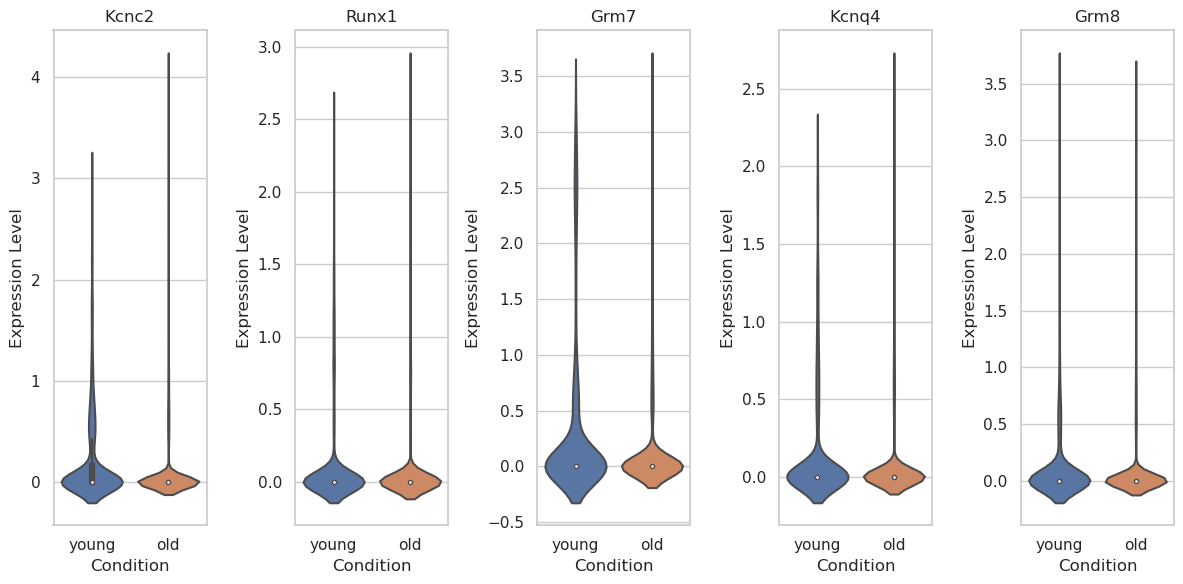

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your marker genes (replace with your actual list)
marker_genes = ['Kcnc2', 'Runx1', 'Grm7','Kcnq4','Grm8']

# Create a subset of the data with only the marker genes
subset_data_marker_genes = new_data[:, marker_genes]

# Extract the expression values from the log1p layer for each marker gene
expression_values = subset_data_marker_genes.layers['log1p']

# do a t-test to see if the expression values are significantly different between the two conditions
from scipy.stats import ttest_ind

young = expression_values[new_data.obs['machine'] == 'old']
old = expression_values[new_data.obs['machine'] == 'new']

ttest_results = ttest_ind(young, old, axis=0)

# Print the results
print('T-test results:')
for marker_gene, ttest_result in zip(marker_genes, ttest_results):
    print(marker_gene, ttest_result)
    
# Create a violin plot for each marker gene
plt.figure(figsize=(12, 6))
for marker_gene in marker_genes:
    plt.subplot(1, len(marker_genes), marker_genes.index(marker_gene) + 1)
    sns.violinplot(
        x='machine',
        y=expression_values[:, marker_genes.index(marker_gene)],  # Correct indexing
        data=subset_data_marker_genes.obs,
        split=True,
        scale='width',
    )
    plt.title(marker_gene)
    plt.xticks([0, 1], ['young', 'old'])
    plt.xlabel('Condition')
    plt.ylabel('Expression Level')

plt.tight_layout()
plt.show()


In [176]:
new_sgns

[Executed on 2023-11-28 19:47:47.645027]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'machine'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-11-28 19:47:17.615141]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


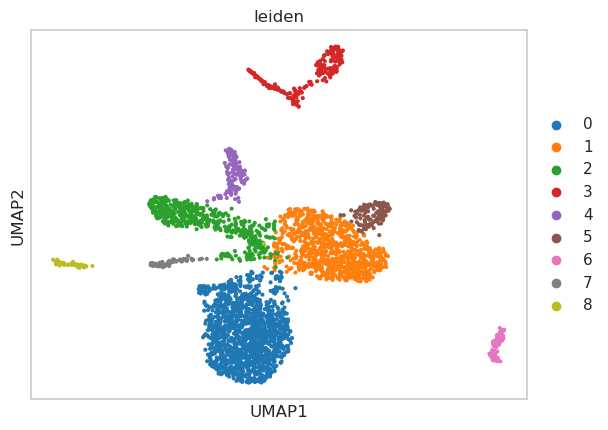

In [174]:
sc.pl.umap(new_sgns,color='leiden')

In [175]:
new_sgns.obs['leiden'].value_counts()

[Executed on 2023-11-28 19:47:30.823811]


leiden
0    1388
1     851
2     504
3     214
4     130
5     117
6      88
7      71
8      50
Name: count, dtype: int64

[Executed on 2023-11-28 14:49:35.999564]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


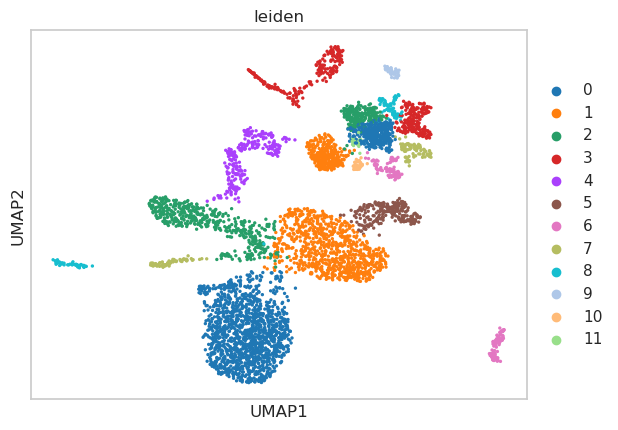

/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


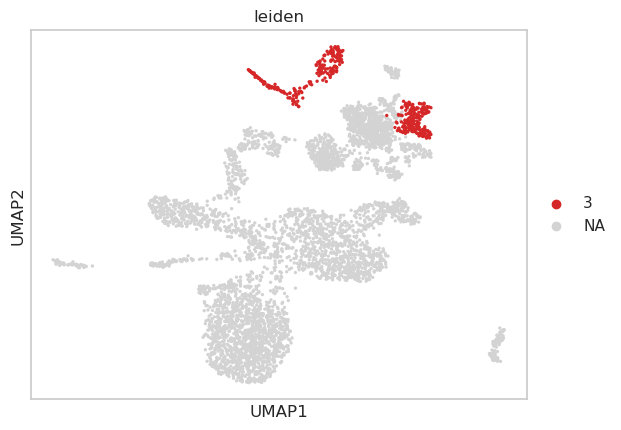

In [85]:
sc.pl.umap(new_data,color=['leiden'],)

# show leiden group 3
sc.pl.umap(new_data,color=['leiden'],groups=['3'])

In [91]:
new_data

[Executed on 2023-11-28 14:52:18.220299]


AnnData object with n_obs × n_vars = 5135 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_vari

In [92]:
new_data.obs['machine'].value_counts()

[Executed on 2023-11-28 14:52:45.084810]


machine
1    3413
0    1722
Name: count, dtype: int64

In [95]:
new_data.obs['leiden_new'].value_counts()

[Executed on 2023-11-28 14:54:11.677685]


leiden_new
Type_1C_neuron    56
Type_1A_neuron    54
Type_1B_neuron    19
Type_2_neuron      8
Name: count, dtype: int64

In [99]:
#change value of leiden_new to string
new_data.obs['leiden_new']=new_data.obs['leiden_new'].astype(str)


[Executed on 2023-11-28 14:59:04.532971]


[Executed on 2023-11-28 14:53:50.597141]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


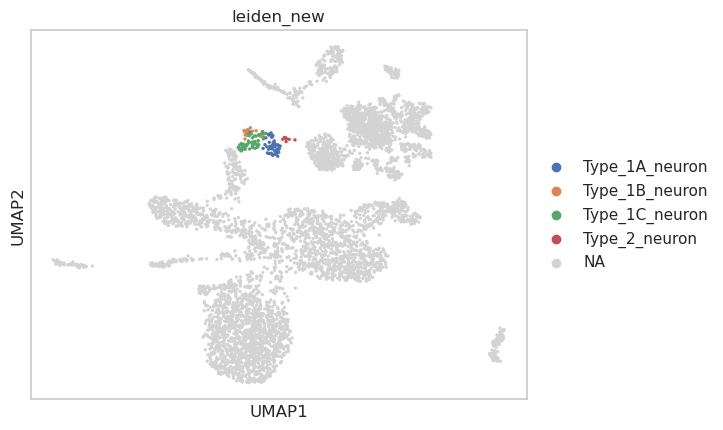

In [94]:
sc.pl.umap(new_data,color='leiden_new')

In [105]:
new_data.obs['machine'].value_counts()

[Executed on 2023-11-28 15:04:37.697236]


machine
1    3413
0    1722
Name: count, dtype: int64

In [108]:
#change to string
new_data.obs['machine']=new_data.obs['machine'].astype(str)

[Executed on 2023-11-28 15:05:19.056705]


In [114]:
old_group

[Executed on 2023-11-28 15:06:46.151583]


View of AnnData object with n_obs × n_vars = 3413 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'hig

In [117]:
old_group.obs['leiden']=old_group.obs['leiden'].astype(str)

[Executed on 2023-11-28 15:07:26.036210]


In [122]:
old_group=new_data[new_data.obs['machine'].isin (['1'])]
old_group=old_group[old_group.obs['leiden'].isin(['3'])]
old_group

[Executed on 2023-11-28 15:08:24.179460]


View of AnnData object with n_obs × n_vars = 214 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'high

In [123]:
neuron_group

[Executed on 2023-11-28 15:08:47.163643]


View of AnnData object with n_obs × n_vars = 137 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'high

In [160]:
combined.write_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/machine_model/neuron_compare.h5ad')

[Executed on 2023-11-28 15:37:05.160174]


In [159]:
# combined old_group and neuron_group
combined=old_group.concatenate(neuron_group,batch_key='machine')
combined

[Executed on 2023-11-28 15:36:38.514033]


/scratch/43158822/ipykernel_6659/2426987508.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined=old_group.concatenate(neuron_group,batch_key='machine')


AnnData object with n_obs × n_vars = 351 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'h

In [157]:
combined.obs['machine'].value_counts()

[Executed on 2023-11-28 15:35:03.238907]


machine
0    214
1    137
Name: count, dtype: int64

[Executed on 2023-11-28 19:42:13.811367]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/cat

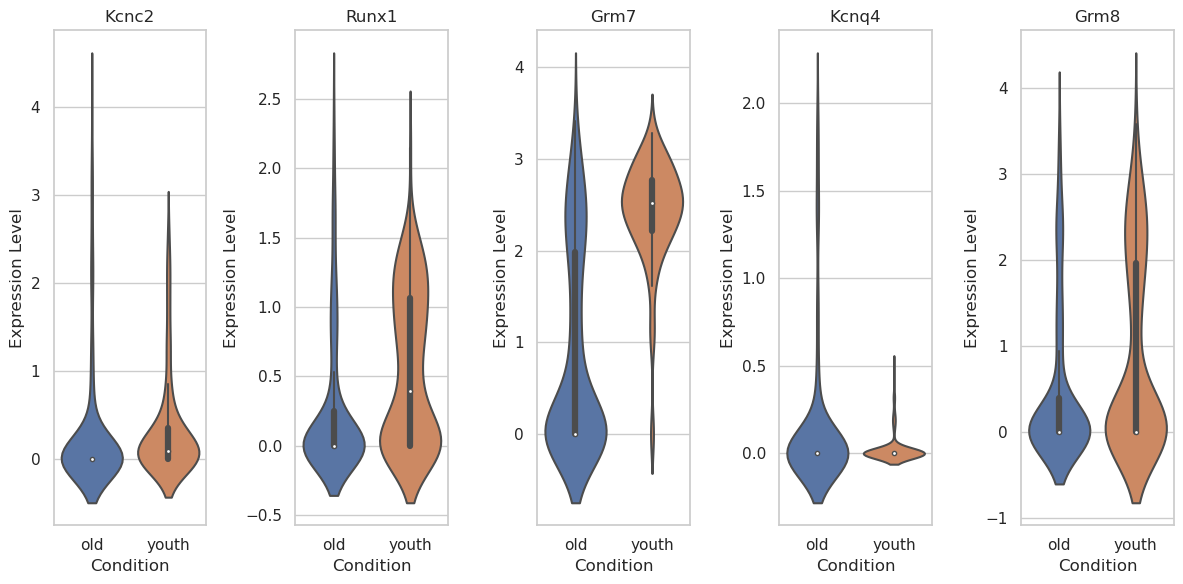

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your marker genes (replace with your actual list)
marker_genes = ['Kcnc2', 'Runx1', 'Grm7','Kcnq4','Grm8']

# Create a subset of the data with only the marker genes
subset_data_marker_genes = combined[:, marker_genes]

# Extract the expression values from the log1p layer for each marker gene
expression_values = subset_data_marker_genes.layers['log1p']

# Create a violin plot for each marker gene
plt.figure(figsize=(12, 6))
for marker_gene in marker_genes:
    plt.subplot(1, len(marker_genes), marker_genes.index(marker_gene) + 1)
    sns.violinplot(
        x='machine',
        y=expression_values[:, marker_genes.index(marker_gene)],  # Correct indexing
        data=subset_data_marker_genes.obs,
        split=True,
        scale='width',
    )
    plt.title(marker_gene)
    plt.xticks([1, 0], ['youth', 'old'])
    plt.xlabel('Condition')
    plt.ylabel('Expression Level')

plt.tight_layout()
plt.show()


[Executed on 2023-11-28 19:45:51.505166]


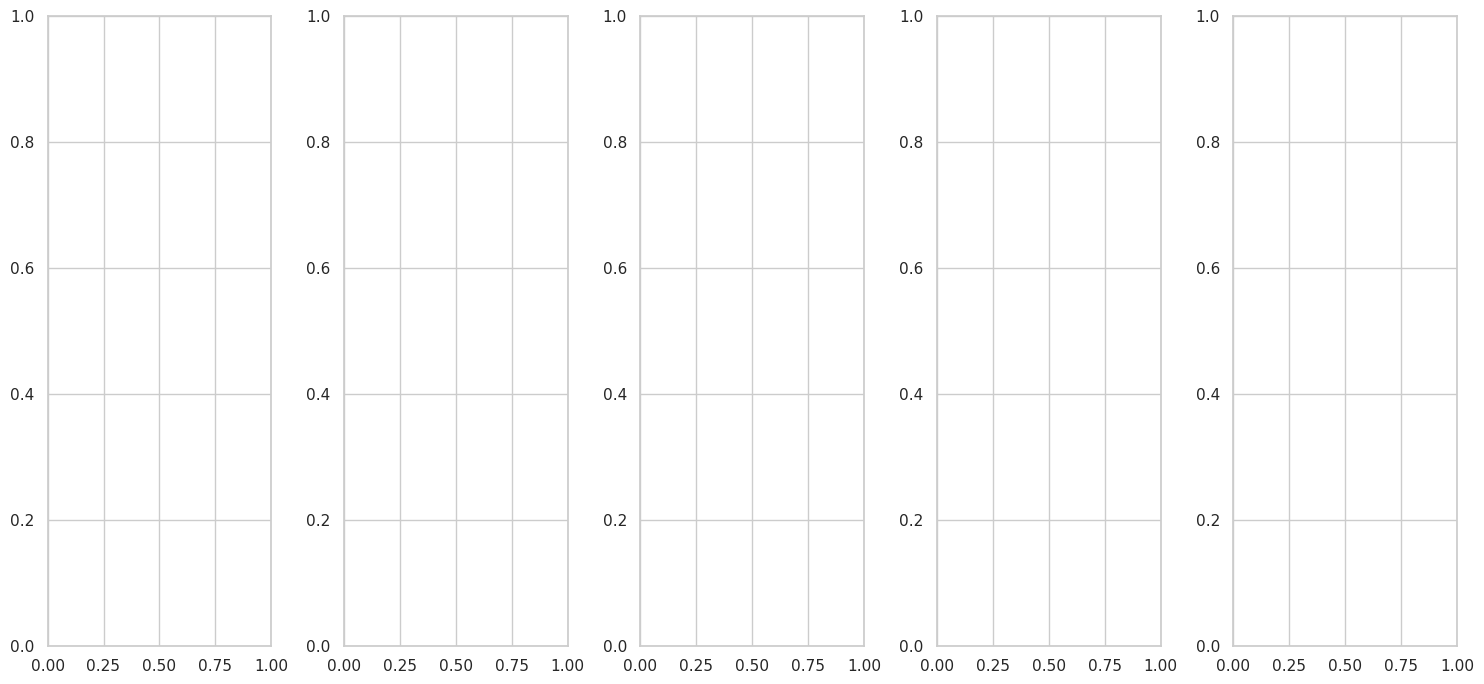

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

# Define your marker genes (replace with your actual list)
marker_genes = ['Kcnc2', 'Runx1', 'Grm7', 'Kcnq4', 'Grm8']

# Create a subset of the data with only the marker genes
subset_data_marker_genes = combined[:, marker_genes]

# Check if the expression_values is a sparse matrix and convert it to a dense format
if isinstance(subset_data_marker_genes.layers['log1p'], np.ndarray):
    expression_values = subset_data_marker_genes.layers['log1p']
else:
    expression_values = subset_data_marker_genes.layers['log1p'].toarray()

# Initialize a list to store the results
t_test_results = {}

# Create a violin plot for each marker gene and perform t-tests
plt.figure(figsize=(15, 7))  # Adjust the figure size if necessary
for i, marker_gene in enumerate(marker_genes):
    # Prepare the subplot
    ax = plt.subplot(1, len(marker_genes), i + 1)
    
    # Extract the expression data for the 'youth' and 'old' groups for the current gene
    gene_index = marker_genes.index(marker_gene)
    youth_expression = expression_values[subset_data_marker_genes.obs['machine'] == 1, gene_index].flatten()
    old_expression = expression_values[subset_data_marker_genes.obs['machine'] == 0, gene_index].flatten()
    
    # Check for NaN values
    if np.isnan(youth_expression).any() or np.isnan(old_expression).any():
        print(f"Warning: NaN values found in expression data for {marker_gene}")
        continue
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(youth_expression, old_expression, equal_var=False, nan_policy='omit')
    
    # Skip the plotting if the t-test couldn't be performed
    if np.isnan(p_value):
        print(f"Warning: t-test could not be performed for {marker_gene}")
        continue
    
    t_test_results[marker_gene] = p_value  # Store the p-value
    
    # Create the violin plot
    sns.violinplot(
        x='machine',
        y=expression_values[:, gene_index],
        data=subset_data_marker_genes.obs,
        split=True,
        scale='width',
        order=[1, 0],  # Ensure youth is on the left and old on the right
    )
    
    # Annotate the plot with the p-value
    ax.set_title(f'{marker_gene} (p={p_value:.2e})')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['youth', 'old'])
    ax.set_xlabel('Condition')
    ax.set_ylabel('Expression Level')

plt.tight_layout()
plt.show()


[Executed on 2023-11-28 15:17:39.269785]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


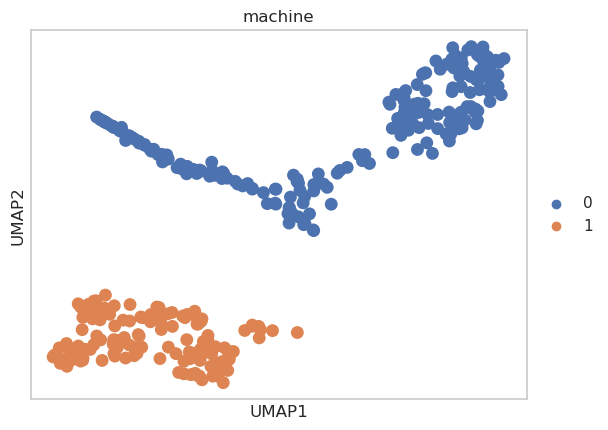

In [129]:
sc.pl.umap(combined,color=['machine'],)

[Executed on 2023-11-28 15:19:10.506520]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


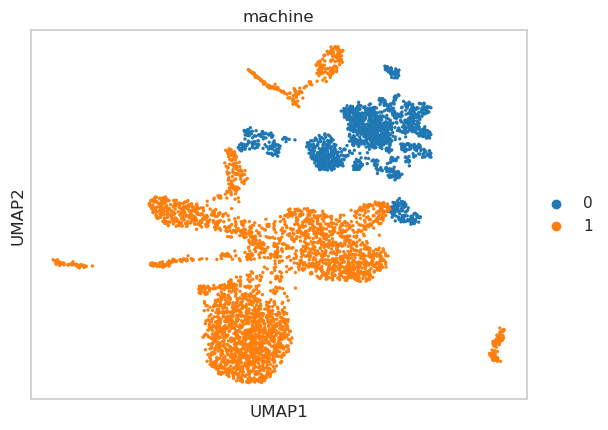

In [130]:
sc.pl.umap(new_data,color=['machine'],)

[Executed on 2023-11-28 15:03:37.387567]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

ValueError: There must be exactly two hue levels to use `split`.'

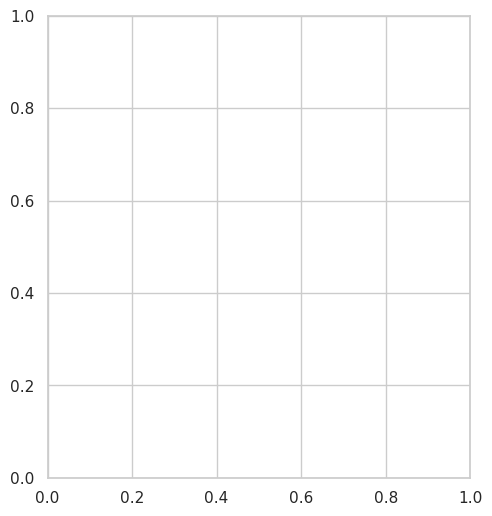

In [102]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Define your marker genes
marker_genes = ['Kcnc2', 'Runx1']  # Replace with your actual list of marker genes

# Filter the data for 'old' group in machine 1
old_group = new_data[(new_data.obs['machine'] == 1) & (new_data.obs['leiden'] == '3')]

# Filter the data for all neurons in 'leiden_new'
neuron_group = new_data[new_data.obs['leiden_new'].str.contains('neuron')]

import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have an AnnData object called 'new_data'
# and you have already selected 'old_group' and 'neuron_group'

# Define your marker genes
marker_genes = ['Kcnc2', 'Runx1']

# Prepare the data for plotting
all_data_for_plotting = []

for gene in marker_genes:
    # Extract the expression data for the 'old' and 'neuron' groups for the current gene
    old_expression = old_group[:, new_data.var_names == gene].X
    neuron_expression = neuron_group[:, new_data.var_names == gene].X
    
    # Flatten the data if it's multidimensional
    old_expression_flat = old_expression.flatten()
    neuron_expression_flat = neuron_expression.flatten()
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(old_expression_flat, neuron_expression_flat, equal_var=False, nan_policy='omit')
    
    # Combine the expression data into a single DataFrame
    combined_data = pd.DataFrame({
        'Expression Level': np.concatenate([old_expression_flat, neuron_expression_flat]),
        'Condition': ['Old'] * len(old_expression_flat) + ['Neuron'] * len(neuron_expression_flat),
        'Gene': gene,
        'p-value': p_value
    })
    
    # Append to the list for plotting
    all_data_for_plotting.append(combined_data)

# Combine all the data for plotting
all_data_for_plotting = pd.concat(all_data_for_plotting)

# Plotting
plt.figure(figsize=(12, 6))
for i, gene in enumerate(marker_genes):
    plt.subplot(1, len(marker_genes), i + 1)
    sns.violinplot(
        x='Gene',
        y='Expression Level',
        hue='Condition',
        data=all_data_for_plotting[all_data_for_plotting['Gene'] == gene],
        split=True,
        scale='width'
    )
    plt.title(f'{gene} (p-value: {all_data_for_plotting.loc[all_data_for_plotting["Gene"] == gene, "p-value"].iloc[0]:.2e})')
    plt.ylabel('Expression Level')

plt.tight_layout()
plt.show()



In [30]:
sc.pp.filter_cells(new_data,min_genes=200)
sc.pp.filter_genes(new_data,min_cells=3)
new_data.var['mt']=new_data.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(new_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
new_data.obs.head()

[Executed on 2023-11-28 13:32:44.738128]


,sample_ID_Plate,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,doublet_scores,predicted_doublets,...,gp1,gp2,gp3,gp4,gp5,gp6,leiden_R,machine,platesID,n_counts
AACCACATCGATCCAAGGAA-0-0,11101383,0,1993,30769,-1407.931763,-3.105781,0.220592,2,0.095284,False,...,-0.022304,-0.013710,-0.457980,-0.213867,-0.168973,-0.100308,2,0,NaN,NaN
AACCACATCGCACGGTGGTT-0-0,11101383,0,3283,30769,187.310669,-7.963215,-4.251341,2,0.056225,False,...,0.526740,-0.031069,-0.359778,0.107557,0.251416,-0.145302,2,0,NaN,NaN
AACCACATCGCCTACTGAAG-0-0,11101383,0,4110,30769,725.542542,-1.540717,-0.212354,1,0.038751,False,...,0.352143,0.567200,-0.002916,-0.041921,0.161929,-0.136083,1,0,NaN,NaN
AACCACATCGTATGCACGCT-0-0,11101383,0,3791,30769,143.569733,-2.650281,-1.845989,1,0.076167,False,...,-0.001347,0.798104,-0.112507,-0.137156,-0.202984,-0.137188,1,0,NaN,NaN
AACGGAATGTACCATATGAG-0-0,11101390,0,4840,30769,2107.861572,6.266803,0.297306,3,0.237323,False,...,0.047055,-0.364451,-0.143328,0.626669,0.307969,0.301578,"3,1",0,NaN,NaN


In [31]:
new_data.X=new_data.layers['umi'].copy()
new_data.layers['counts']=new_data.X.copy()

[Executed on 2023-11-28 13:33:00.477156]


In [32]:
new_data.X

[Executed on 2023-11-28 13:33:03.437757]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
new_data

[Executed on 2023-11-28 13:09:26.349982]


AnnData object with n_obs × n_vars = 5135 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_vari

In [33]:
sc.pp.highly_variable_genes(new_data,n_top_genes=3500,flavor='seurat_v3',layer='counts',subset=True)
scvi.model.SCVI.setup_anndata(new_data,layer='counts',batch_key='machine')
scvi_model=scvi.model.SCVI(new_data,n_layers=2,n_latent=50)

[Executed on 2023-11-28 13:33:06.680446]


In [35]:
new_data.write_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/merge_old_new.h5ad')

[Executed on 2023-11-28 13:36:37.506371]


In [36]:
new_data

[Executed on 2023-11-28 13:39:41.723083]


AnnData object with n_obs × n_vars = 5135 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_vari

[Executed on 2023-11-28 13:41:17.720857]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


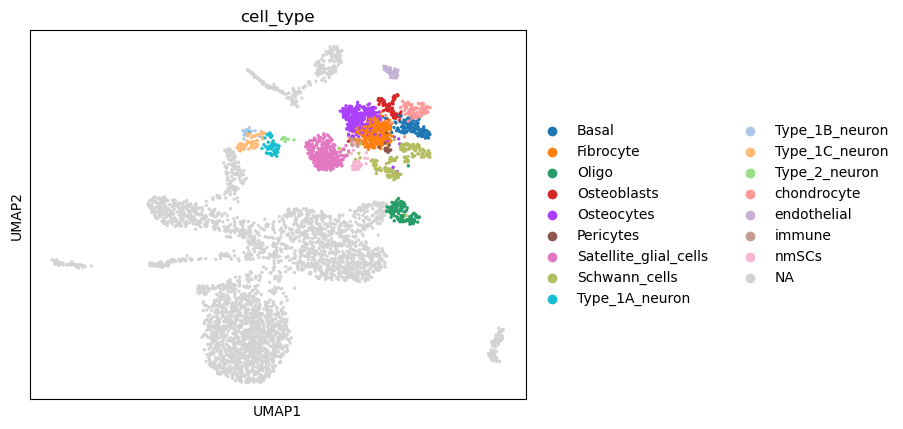

In [37]:
sc.pl.umap(new_data,color=['cell_type'])

In [34]:
scvi_model.train(max_epochs=50)

scvi_model.save('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/machine_model/scvi-model',save_anndata=True,overwrite=True)

[Executed on 2023-11-28 13:33:21.975553]


RuntimeError: You set `--ntasks=18` in your SLURM bash script, but this variable is not supported. HINT: Use `--ntasks-per-node=18` instead.

In [13]:
import scvi
import torch
model_path = "/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/machine_model/scvi-model/model.pt"
scvi_model = torch.load(model_path)


[Executed on 2023-11-28 13:05:25.373790]


In [14]:
scvi_model

[Executed on 2023-11-28 13:05:27.949120]


{'model_state_dict': OrderedDict([('px_r',
               tensor([-0.5623, -1.0256,  0.9232,  ..., -1.3047, -0.1996, -1.1060])),
              ('z_encoder.encoder.fc_layers.Layer 0.0.weight',
               tensor([[-2.6645e-02,  6.1918e-03,  2.3508e-02,  ..., -1.5644e-03,
                        -2.9019e-02, -7.3171e-04],
                       [-6.6379e-02,  5.2389e-03,  2.0706e-02,  ..., -3.1130e-02,
                         1.8054e-02, -3.7227e-03],
                       [-2.8824e-02,  2.5803e-02, -3.9647e-02,  ..., -1.0630e-02,
                         8.1548e-03, -1.4656e-03],
                       ...,
                       [ 1.4787e-03,  2.0063e-02,  1.2801e-02,  ...,  2.7293e-02,
                         1.2740e-02,  1.5538e-04],
                       [ 6.0789e-02,  4.7598e-02, -4.1592e-03,  ...,  2.2085e-02,
                        -3.5968e-02,  1.8420e-02],
                       [ 1.9158e-02, -9.5577e-05,  4.6498e-02,  ...,  4.0763e-03,
                         3.1268e-

In [15]:
SCVI_LATENT_KEY = "X_scVI"
new_data.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation()

[Executed on 2023-11-28 13:08:38.061201]


AttributeError: 'dict' object has no attribute 'get_latent_representation'

In [ ]:
scanvi_model=scvi.model.scanvi.from_scvi_model(scvi_model, adata=new_data, unlabelled_cate)

In [18]:
adata1=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/machine_model/scvi-model/adata.h5ad")
adata1

[Executed on 2023-11-28 13:09:51.479813]


AnnData object with n_obs × n_vars = 5135 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'machine', 'platesID', 'n_counts', '_scvi_batch', '_scvi_labels'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_vari

[Executed on 2023-11-28 13:12:45.294441]


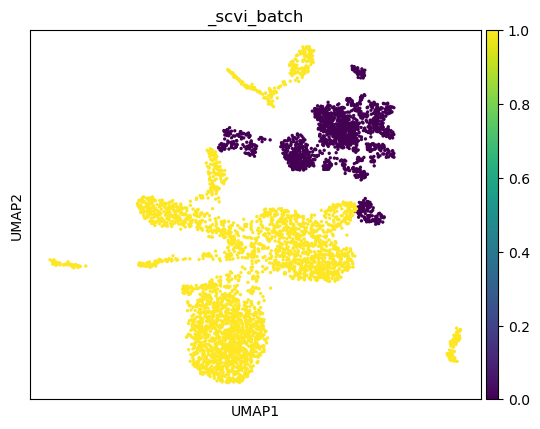

In [21]:
sc.pl.embedding(adata1,basis='umap',color='_scvi_batch')